In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Measure Frustration of Complete PDB

In [2]:
structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


In [3]:
import pandas
structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)
data = pandas.read_csv('tests/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_singleresidue', delim_whitespace=True)
#data = pandas.read_csv('examples/data/1l63_/FrustrationData/2023291774290287.pdb_singleresidue', delim_whitespace=True)
#data = pandas.read_csv('examples/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_singleresidue', delim_whitespace=True)

#Check that all the rho were calculated correctly
assert np.alltrue((data['DensityRes']-model.rho_r)**2<1E-3**2)


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


In [4]:
structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [5]:
data_files = [
{'sequence_separation':2,  'frustration_type':'singleresidue',   'electrostatics': False, 'file_path':'tests/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_singleresidue'},
{'sequence_separation':2,  'frustration_type':'mutational',      'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_mutational'},
{'sequence_separation':2,  'frustration_type':'configurational', 'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_configurational'},
{'sequence_separation':2,  'frustration_type':'singleresidue',   'electrostatics': True, 'file_path': 'tests/data/1l63_seqsep_3_electrostatics/FrustrationData/2023291774290287.pdb_singleresidue'},
{'sequence_separation':2,  'frustration_type':'mutational',      'electrostatics': True, 'file_path': 'tests/data/1l63_seqsep_3_electrostatics/FrustrationData/2023291774290287.pdb_mutational'},
{'sequence_separation':2,  'frustration_type':'configurational', 'electrostatics': True, 'file_path': 'tests/data/1l63_seqsep_3_electrostatics/FrustrationData/2023291774290287.pdb_configurational'},
{'sequence_separation':13, 'frustration_type':'singleresidue',   'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_12/FrustrationData/2023291774290287.pdb_singleresidue'},
{'sequence_separation':13,  'frustration_type':'mutational',     'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_12/FrustrationData/2023291774290287.pdb_mutational'},
{'sequence_separation':13, 'frustration_type':'configurational', 'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_12/FrustrationData/2023291774290287.pdb_configurational'}]

# All the densities seem to be correctly calculated

In [6]:
import pandas
for f in data_files:
    seq_sep = f['sequence_separation']
    electrostatics = f['electrostatics']

    structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
    model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff = 9.5, min_sequence_separation_rho = seq_sep, electrostatics=electrostatics)
    data = pd.read_csv(f['file_path'], delim_whitespace=True)

    if f['frustration_type'] != 'singleresidue':
        res1 = data[['#Res1','DensityRes1']]
        res2 = data[['Res2','DensityRes2']]
        res1.columns = ['Res','DensityRes']
        res2.columns = ['Res','DensityRes']
        temp = pd.concat([res1,res2])
        assert np.all(temp.groupby('Res').std()==0)
        density_data = temp.groupby('Res').mean().reset_index()
    else:
        density_data = data

    #Check that all the rho were calculated correctly
    assert np.alltrue((density_data['DensityRes']-model.rho_r)**2<1E-3**2)

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


True
I am here


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


True
I am here


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


True
I am here


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False
False


13


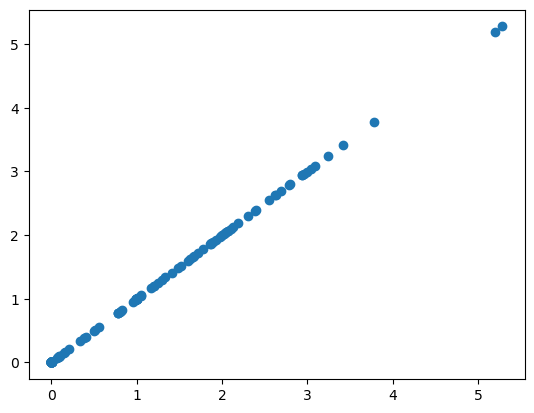

In [7]:
#structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
#model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=None, sequence_cutoff=None, min_sequence_separation_rho = 13, min_sequence_separation_contact = 5)
print(seq_sep)
plt.scatter(density_data['DensityRes'],model.rho_r)

# Still working on the native energies

In [8]:
#import itertools

for f in data_files:
    if f['frustration_type'] != 'singleresidue':
        continue
    data = pd.read_csv(f['file_path'], delim_whitespace=True)
    
    seq_sep = f['sequence_separation']
    electrostatics = f['electrostatics']

    structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
    model=dca_frustratometer.AWSEMFrustratometer(structure, distance_cutoff = 9.5, sequence_cutoff = seq_sep, min_sequence_separation_rho = seq_sep, electrostatics=electrostatics, min_sequence_separation_contact = seq_sep)
    #for ii,jj,kk in itertools.product([None],range(10),range(10)):



    #model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=9.5, sequence_cutoff=2, min_sequence_separation_rho = 2, min_sequence_separation_contact = 1.9)
    _AA = '-ACDEFGHIKLMNPQRSTVWY'
    seq = model.sequence
    potts_model = model.potts_model
    mask = model.mask
    seq_index = np.array([_AA.find(aa) for aa in seq])
    seq_len = len(seq_index)
    pos1, pos2 = np.meshgrid(np.arange(seq_len), np.arange(seq_len), indexing='ij', sparse=True)
    aa1, aa2 = np.meshgrid(seq_index, seq_index, indexing='ij', sparse=True)

    h = -potts_model['h'][range(seq_len), seq_index]
    j = -potts_model['J'][pos1, pos2, aa1, aa2]

    j_prime = j * mask
    energy = h.sum() + j_prime.sum()/2
    energy_per_residue = h+j_prime.sum(axis=0)/2
    energy_per_residue2 = h+j_prime.sum(axis=0)
    print(f)
    print(energy_per_residue2.sum()-(data['NativeEnergy']*4.184).sum(),(energy_per_residue2 - data['NativeEnergy']*4.184).max())
    if electrostatics:
        break


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


False
{'sequence_separation': 2, 'frustration_type': 'singleresidue', 'electrostatics': False, 'file_path': 'tests/data/1l63_seqsep_3/FrustrationData/2023291774290287.pdb_singleresidue'}
0.006087348039272911 0.00207894760482219
True
I am here
{'sequence_separation': 2, 'frustration_type': 'singleresidue', 'electrostatics': True, 'file_path': 'tests/data/1l63_seqsep_3_electrostatics/FrustrationData/2023291774290287.pdb_singleresidue'}
15.837888681531922 3.7683985413525867


In [41]:
data = pd.read_csv(f['file_path'], delim_whitespace=True)

seq_sep = f['sequence_separation']
electrostatics = f['electrostatics']

structure=dca_frustratometer.Structure.full_pdb('examples/data/1l63.pdb',"A")
model=dca_frustratometer.AWSEMFrustratometer(structure, distance_cutoff = 9.5, sequence_cutoff = seq_sep, electrostatics=True,
                                             min_sequence_separation_rho = seq_sep, min_sequence_separation_contact = seq_sep, min_sequence_separation_electrostatics=2)
#for ii,jj,kk in itertools.product([None],range(10),range(10)):



#model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=9.5, sequence_cutoff=2, min_sequence_separation_rho = 2, min_sequence_separation_contact = 1.9)
_AA = '-ACDEFGHIKLMNPQRSTVWY'
seq = model.sequence
potts_model = model.potts_model
mask = model.mask
seq_index = np.array([_AA.find(aa) for aa in seq])
seq_len = len(seq_index)
pos1, pos2 = np.meshgrid(np.arange(seq_len), np.arange(seq_len), indexing='ij', sparse=True)
aa1, aa2 = np.meshgrid(seq_index, seq_index, indexing='ij', sparse=True)

h = -potts_model['h'][range(seq_len), seq_index]
j = -potts_model['J'][pos1, pos2, aa1, aa2]

j_prime = j * mask
energy = h.sum() + j_prime.sum()/2
energy_per_residue = h+j_prime.sum(axis=0)/2
energy_per_residue2 = h+j_prime.sum(axis=0)
print(f)
print(energy_per_residue2.sum()-(data['NativeEnergy']*4.184).sum(),(energy_per_residue2 - data['NativeEnergy']*4.184).max())

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


True
I am here
{'sequence_separation': 2, 'frustration_type': 'singleresidue', 'electrostatics': True, 'file_path': 'tests/data/1l63_seqsep_3_electrostatics/FrustrationData/2023291774290287.pdb_singleresidue'}
18.306621058281962 3.7683985413525867


In [36]:
model.contact_energy.shape

(4, 162, 162, 20, 20)

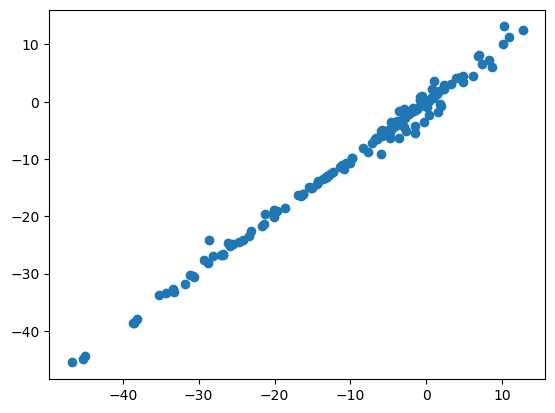

In [37]:
plt.scatter(energy_per_residue2,data['NativeEnergy']*4.184)

(-1.0, 162.0)

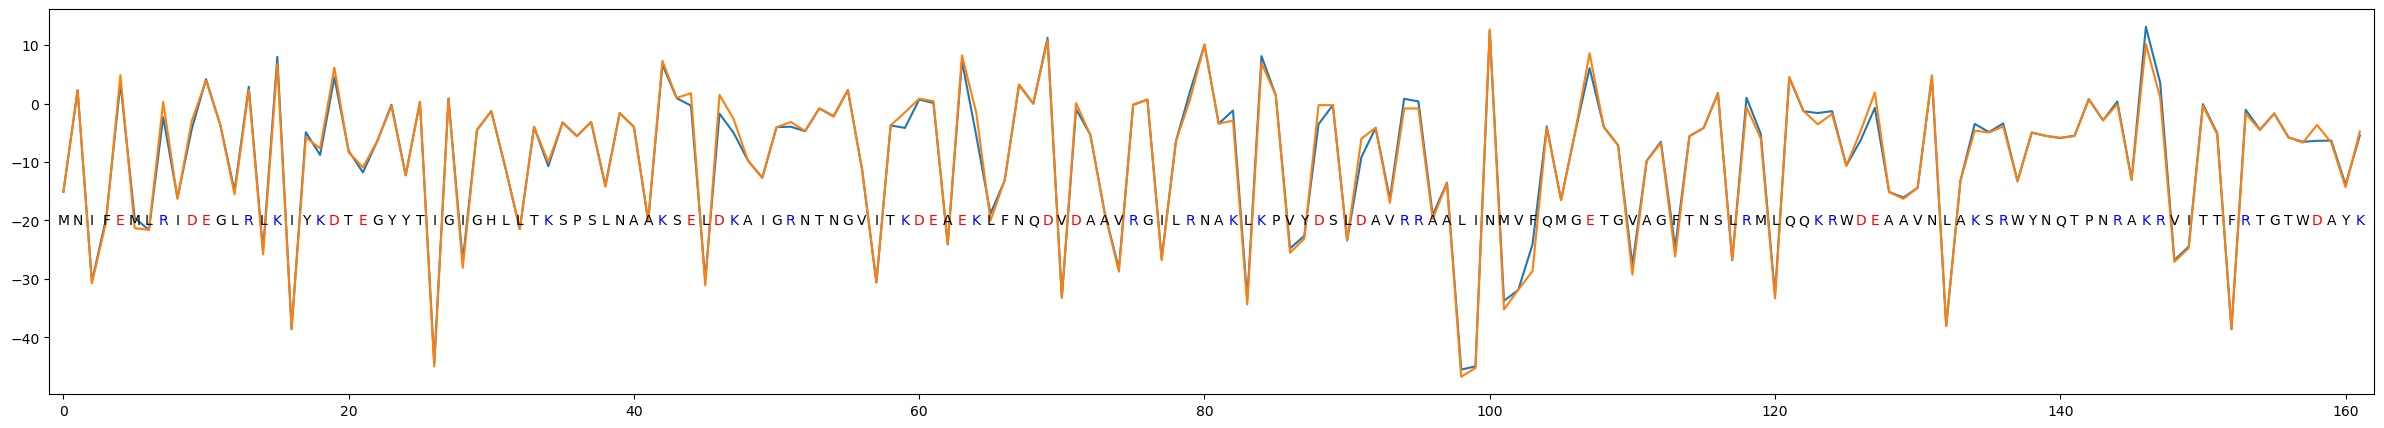

In [39]:
plt.figure(figsize=(30,5))
plt.plot(data['NativeEnergy']*4.184)
plt.plot(energy_per_residue2)
#plt.plot(energy_sep10)

for x,y,s in [(i,-20,a) for i,a in enumerate(seq)]:
    if s in ['E','D']:
        color='red'
    elif s in ['R','K']:
        color='blue'
    else:
        color='black'
    plt.text(x,y,s,color=color, horizontalalignment='center', verticalalignment='center',)
plt.xlim(-1,162)



(-1.0, 162.0)

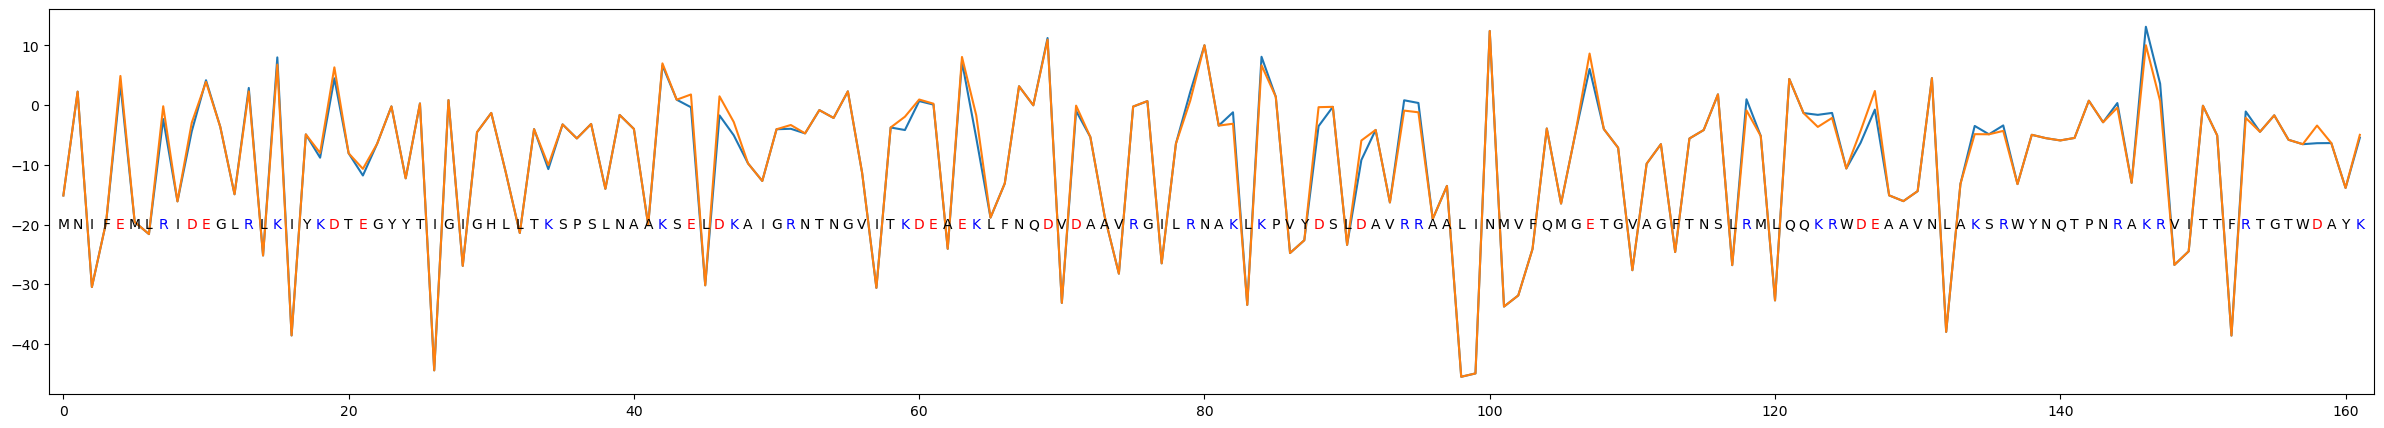

In [32]:
plt.figure(figsize=(30,5))
plt.plot(data['NativeEnergy']*4.184)
plt.plot(energy_per_residue2)
#plt.plot(energy_sep10)

for x,y,s in [(i,-20,a) for i,a in enumerate(seq)]:
    if s in ['E','D']:
        color='red'
    elif s in ['R','K']:
        color='blue'
    else:
        color='black'
    plt.text(x,y,s,color=color, horizontalalignment='center', verticalalignment='center',)
plt.xlim(-1,162)

In [25]:
energy_sep10 = energy_per_residue2

In [14]:
energy_per_residue2,data['NativeEnergy']*4.184

(array([-1.51300410e+01,  2.26308513e+00, -3.04650080e+01, -1.95913045e+01,
         4.88929732e+00, -1.95638196e+01, -2.16009097e+01, -1.84917053e-01,
        -1.61174970e+01, -2.95912953e+00,  3.89100353e+00, -3.63206758e+00,
        -1.49270984e+01,  2.30173999e+00, -2.51854550e+01,  6.79335444e+00,
        -3.85774277e+01, -4.89780014e+00, -8.01034491e+00,  6.33032209e+00,
        -8.06422222e+00, -1.06680691e+01, -6.45722723e+00, -2.07951302e-01,
        -1.22591222e+01,  2.84409860e-01, -4.44265805e+01,  8.47776263e-01,
        -2.69258233e+01, -4.53444088e+00, -1.30546441e+00, -1.10926331e+01,
        -2.14192313e+01, -4.01846970e+00, -1.00429376e+01, -3.22591710e+00,
        -5.57429444e+00, -3.15238366e+00, -1.40162561e+01, -1.64215035e+00,
        -3.98701474e+00, -2.00660936e+01,  7.00034127e+00,  9.12232919e-01,
         1.78946840e+00, -3.01787283e+01,  1.48127594e+00, -2.82569741e+00,
        -9.75644469e+00, -1.26993280e+01, -4.03519056e+00, -3.32376454e+00,
        -4.7

<AxesSubplot:>

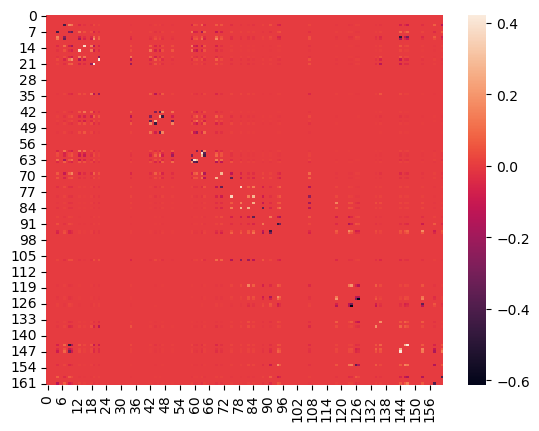

In [15]:
sns.heatmap(model.contact_energy[-1][:, :, model.aa_map_awsem_x, model.aa_map_awsem_y][pos1,pos2,aa1,aa2])

<AxesSubplot:>

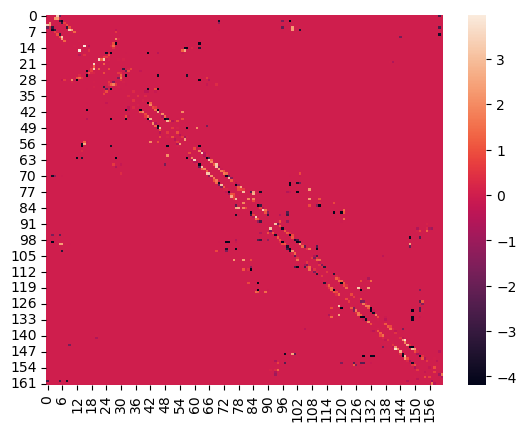

In [ ]:
sns.heatmap(model.contact_energy[0][:, :, model.aa_map_awsem_x, model.aa_map_awsem_y][pos1,pos2,aa1,aa2])

<AxesSubplot:>

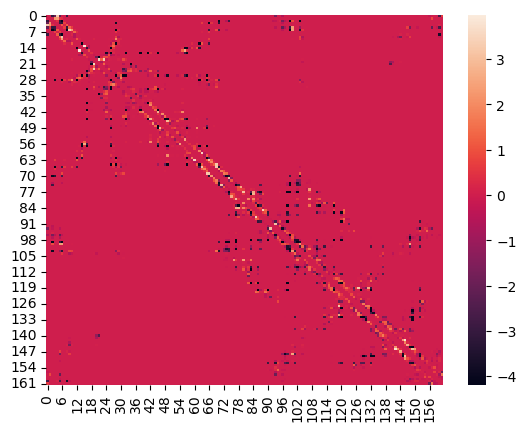

In [ ]:
sns.heatmap(j)

<AxesSubplot:>

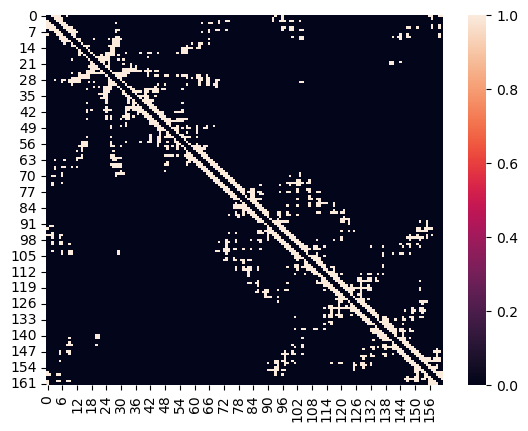

In [ ]:
sns.heatmap(mask)

In [ ]:
model.sequence

Seq('MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNT...AYK')

In [ ]:
j_sum=j_prime.sum(axis=0)
e = h[:,None]+h[None,:]+j_sum[:,None]+j_sum[None,:]-j_prime
ii=data['#Res1']-1
jj=data['Res2']-1
assert(np.alltrue(model.mask[ii,jj]))

print(((e[ii,jj]-data['NativeEnergy']*4.184)**2).sum())#,(energy_per_residue2 - data['NativeEnergy']*4.184).max())
plt.scatter(e[ii,jj],data['NativeEnergy']*4.184)

KeyError: '#Res1'

<AxesSubplot:>

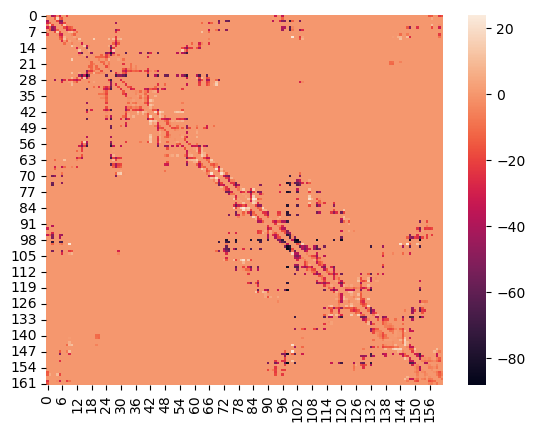

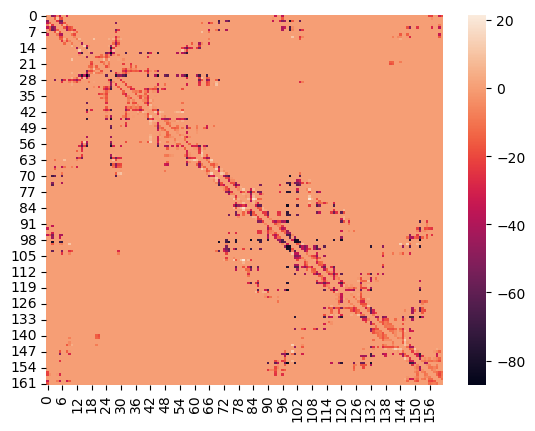

In [ ]:
j_sum=j_prime.sum(axis=0)
e = j_prime+h[:,None]+h[None,:]+j_sum[:,None]+j_sum[None,:]
e_data=np.zeros(e.shape)
ii=data['#Res1']-1
jj=data['Res2']-1
e_data[ii,jj]= data['NativeEnergy']*4.184
e_data[jj,ii]= data['NativeEnergy']*4.184
sns.heatmap(e_data)
plt.figure()
sns.heatmap(e*mask)

In [ ]:
data

#Res1  Res2 ChainRes1 ChainRes2  DensityRes1  DensityRes2 AA1 AA2  \
0        1     3         A         A        2.957        4.262   M   I   
1        1     4         A         A        2.957        3.271   M   F   
2        1     5         A         A        2.957        3.467   M   E   
3        1     6         A         A        2.957        6.295   M   M   
4        1     9         A         A        2.957        2.456   M   I   
..     ...   ...       ...       ...          ...          ...  ..  ..   
951    158   161         A         A        2.510        4.772   W   Y   
952    158   162         A         A        2.510        2.000   W   K   
953    159   161         A         A        2.802        4.772   D   Y   
954    159   162         A         A        2.802        2.000   D   K   
955    160   162         A         A        1.026        2.000   A   K   

     NativeEnergy  DecoyEnergy  SDEnergy  FrstIndex        Welltype  FrstState  
0          -9.735       -2.667     4.515      1.565            long  minimally  
1          -7.350       -1.928     3.507      1.546            long  minimally  
2          -1.002       -2.717     3.974     -0.431           short    neutral  
3          -7.281       -1.974     4.727      1.123           short  minimally  
4          -5.302       -1.590     2.220      1.672            long  minimally  
..            ...          ...       ...        ...             ...        ...  
951        -3.423       -0.991     2.787      0.873           short  minimally  
952        -1.698       -2.329     1.725     -0.366           short    neutral  
953        -2.737       -0.815     3.291      0.584            long    neutral  
954        -0.347       -2.475     2.295     -0.927           short    neutral  
955        -2.062       -2.608     1.787     -0.306  water-mediated    neutral  

[956 rows x 14 columns]

In [ ]:
(h[0]+h[2]+j_prime[0].sum()+j_prime[2].sum()-j_prime[0,2]*1)/4.184

-10.176564534746886

In [ ]:
j_prime[0].sum()/4.184,j_prime[2].sum()/4.184,j_prime[0,2]/4.184

(-2.758916231274821, -6.356615114474067, -0.720913717828037)

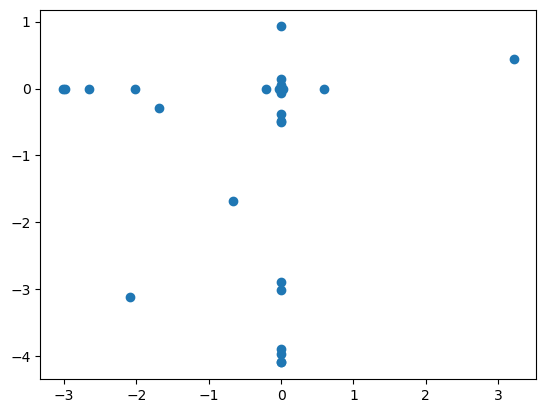

In [ ]:
plt.scatter(j[0],j[2])

In [ ]:
pd.read_csv(data_files[0]['file_path'], delim_whitespace=True)

#Res ChainRes  DensityRes AA  NativeEnergy  DecoyEnergy  SDEnergy  \
0       1        A       2.957  M        -3.616       -1.519     2.390   
1       2        A       2.053  N         0.541       -0.974     1.514   
2       3        A       4.262  I        -7.281       -2.255     3.939   
3       4        A       3.271  F        -4.682       -1.158     2.253   
4       5        A       3.467  E         1.270       -1.132     2.209   
..    ...      ...         ... ..           ...          ...       ...   
157   158        A       2.510  W        -1.563       -1.374     1.101   
158   159        A       2.802  D        -0.680       -0.289     0.643   
159   160        A       1.026  A        -1.518       -1.846     1.098   
160   161        A       4.772  Y        -3.314       -0.747     2.354   
161   162        A       2.000  K        -1.093       -0.979     0.747   

     FrstIndex  
0        0.878  
1       -1.000  
2        1.276  
3        1.565  
4       -1.087  
..         ...  
157      0.172  
158      0.609  
159     -0.299  
160      1.091  
161      0.152  

[162 rows x 8 columns]

In [ ]:
electrostatics_k = 1.0
electrostatics_screening_length = 10.0
electrostatics_min_sequence_separation = 10

electrostatics_mask = dca_frustratometer.frustration.compute_mask(model.distance_matrix, sequence_distance_cutoff=electrostatics_min_sequence_separation)
# ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
q = np.array([0, 1, 0, -1, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
qq = q[:,np.newaxis]*q[np.newaxis,:]

electrostatics_indicator = np.exp(-electrostatics_k * model.distance_matrix / electrostatics_screening_length)*electrostatics_mask
electrostatics_energy = (qq[:,:,np.newaxis,np.newaxis]*electrostatics_indicator[np.newaxis,np.newaxis,:,:])




#electrostatics = epsilon * term_qq_by_r * np.exp(-k_screening*rij/screening_length)*mask

In [ ]:
sns.heatmap()

TypeError: heatmap() missing 1 required positional argument: 'data'

In [ ]:
temp=(energy_per_residue2 - data['NativeEnergy']*4.184).sort_values()
temp

74    -0.002073
39    -0.002022
121   -0.002021
14    -0.001959
160   -0.001945
         ...   
95     0.001935
72     0.001959
104    0.001960
137    0.002041
132    0.002079
Name: NativeEnergy, Length: 162, dtype: float64

-28.22108 -28.223153041532598 -16.05411023807513 -3.885067434617658 -24.33808560691494


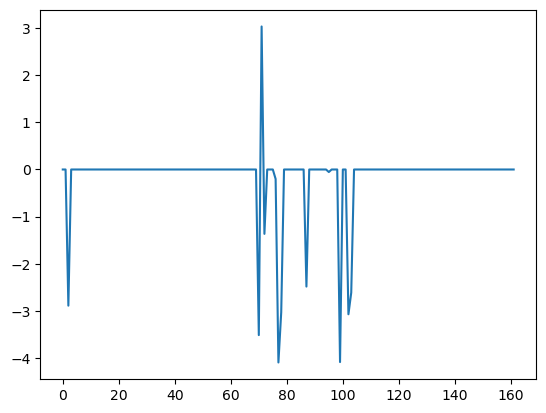

In [ ]:
i=temp.index[0]
print(data['NativeEnergy'][i]*4.184,h[i]+j_prime[i].sum(),h[i]+j_prime[i].sum()/2,h[i],j_prime[i].sum())
plt.plot(j_prime[i])

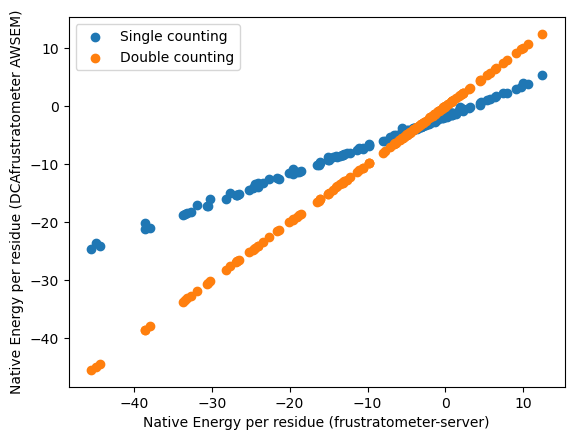

In [ ]:
plt.scatter(data['NativeEnergy']*4.184,energy_per_residue)
plt.scatter(data['NativeEnergy']*4.184,energy_per_residue2)
plt.xlabel('Native Energy per residue (frustratometer-server)')
plt.ylabel('Native Energy per residue (DCAfrustratometer AWSEM)')
plt.legend(['Single counting','Double counting'])


In [ ]:
def compute_singleresidue_decoy_energy_fluctuation_doublecounting(seq: str,
                                                                  potts_model: dict,
                                                                  mask: np.array) -> np.array:
    r"""
    $ \Delta H_i = \Delta h_i + \sum_k\Delta j_{ik} $

    :param seq:
    :param potts_model:
    :param mask:
    :return:
    """
    seq_index = np.array([_AA.find(aa) for aa in seq])
    seq_len = len(seq_index)

    # Create decoys
    pos1, aa1 = np.meshgrid(np.arange(seq_len), np.arange(21), indexing='ij', sparse=True)

    decoy_energy = np.zeros([seq_len, 21])
    decoy_energy -= (potts_model['h'][pos1, aa1] - potts_model['h'][pos1, seq_index[pos1]])  # h correction aa1

    j_correction = np.zeros([seq_len, seq_len, 21])
    # J correction interactions with other aminoacids
    reduced_j = potts_model['J'][range(seq_len), :, seq_index, :].astype(np.float32)
    j_correction += reduced_j[:, pos1, seq_index[pos1]] * mask[:, pos1]
    j_correction -= reduced_j[:, pos1, aa1] * mask[:, pos1]

    # J correction, interaction with self aminoacids
    decoy_energy += j_correction.sum(axis=0)

    return decoy_energy


Text(0, 0.5, 'Decoy Energy fluctuation per residue (DCAfrustratometer AWSEM)')

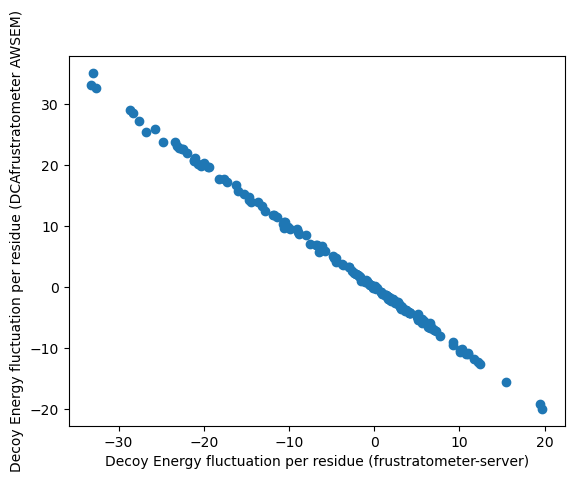

In [ ]:
decoy_fluctuation = dca_frustratometer.frustration.compute_singleresidue_decoy_energy_fluctuation(model.sequence,model.potts_model,model.mask)
aa_freq = dca_frustratometer.frustration.compute_aa_freq(model.sequence)
mean_decoy_energy = (aa_freq * decoy_fluctuation).sum(axis=1) / aa_freq.sum()
#plt.scatter(data['DecoyEnergy']*4.184,mean_decoy_energy)
plt.scatter((data['NativeEnergy']-data['DecoyEnergy'])*4.184,mean_decoy_energy)
plt.xlabel('Decoy Energy fluctuation per residue (frustratometer-server)')
plt.ylabel('Decoy Energy fluctuation per residue (DCAfrustratometer AWSEM)')


In [ ]:
#Assert that the difference in energy is less than 2kt
assert np.all(((data['NativeEnergy']-data['DecoyEnergy'])*4.184+mean_decoy_energy)<2*2.479)

<AxesSubplot:>

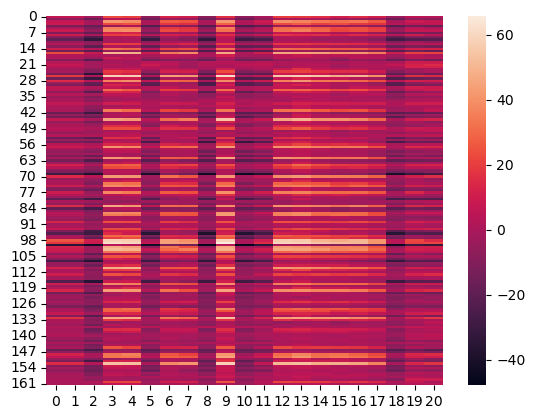

In [ ]:
sns.heatmap(decoy_fluctuation)

Text(0, 0.5, 'Decoy Energy STD per residue (DCAfrustratometer AWSEM)')

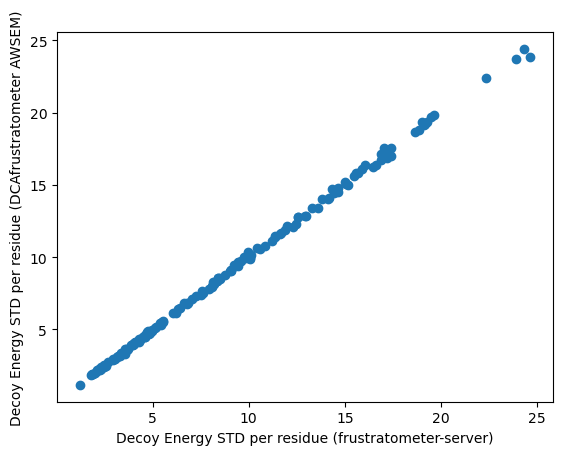

In [ ]:
std_energy = np.sqrt(((aa_freq * (decoy_fluctuation - mean_decoy_energy[:, np.newaxis]) ** 2) / aa_freq.sum()).sum(axis=1))
plt.scatter(data['SDEnergy']*4.184,std_energy)
plt.xlabel('Decoy Energy STD per residue (frustratometer-server)')
plt.ylabel('Decoy Energy STD per residue (DCAfrustratometer AWSEM)')


Text(0, 0.5, 'Frustration per residue (DCAfrustratometer AWSEM)')

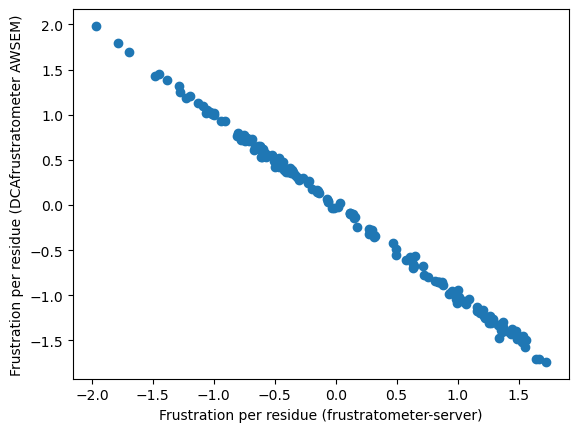

In [ ]:
std_energy = np.sqrt(((aa_freq * (decoy_fluctuation - mean_decoy_energy[:, np.newaxis]) ** 2) / aa_freq.sum()).sum(axis=1))
plt.scatter(data['FrstIndex'],model.frustration('singleresidue',aa_freq))
plt.xlabel('Frustration per residue (frustratometer-server)')
plt.ylabel('Frustration per residue (DCAfrustratometer AWSEM)')


In [ ]:
data

#Res ChainRes  DensityRes AA  NativeEnergy  DecoyEnergy  SDEnergy  \
0       1        A       2.957  M        -3.616       -1.519     2.390   
1       2        A       2.053  N         0.541       -0.974     1.514   
2       3        A       4.262  I        -7.281       -2.255     3.939   
3       4        A       3.271  F        -4.682       -1.158     2.253   
4       5        A       3.467  E         1.270       -1.132     2.209   
..    ...      ...         ... ..           ...          ...       ...   
157   158        A       2.510  W        -1.563       -1.374     1.101   
158   159        A       2.802  D        -0.680       -0.289     0.643   
159   160        A       1.026  A        -1.518       -1.846     1.098   
160   161        A       4.772  Y        -3.314       -0.747     2.354   
161   162        A       2.000  K        -1.093       -0.979     0.747   

     FrstIndex  
0        0.878  
1       -1.000  
2        1.276  
3        1.565  
4       -1.087  
..         ...  
157      0.172  
158      0.609  
159     -0.299  
160      1.091  
161      0.152  

[162 rows x 8 columns]

In [ ]:
data['NativeEnergy'].sum()*4.184

-1449.747632

In [ ]:
(data['NativeEnergy']*4.184)[0]

-15.129344000000001

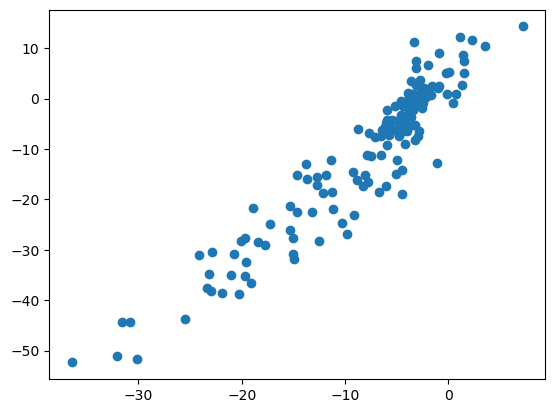

In [ ]:
plt.scatter(energy_per_residue,data['NativeEnergy']*4.814)

In [ ]:

model.native_energy()

-915.0097054277999

In [ ]:
data['NativeEnergy'].sum()*4.184/2

-724.873816

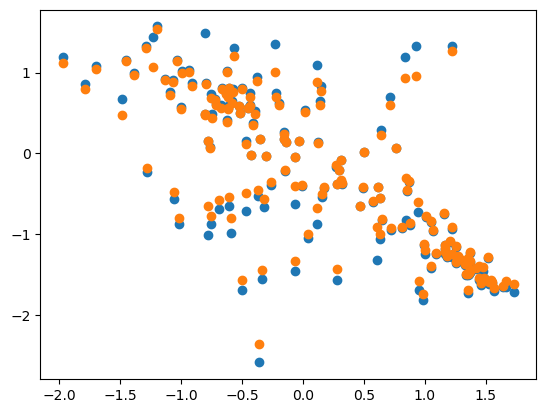

In [ ]:
frustration = model.frustration('singleresidue',aa_freq=dca_frustratometer.frustration.compute_aa_freq(model.sequence))
frustration2 = model.frustration('singleresidue',aa_freq=dca_frustratometer.frustration.compute_aa_freq(model.sequence),correction=0.1)
plt.scatter(data['FrstIndex'],frustration)
plt.scatter(data['FrstIndex'],frustration2)

0.5964557876243981


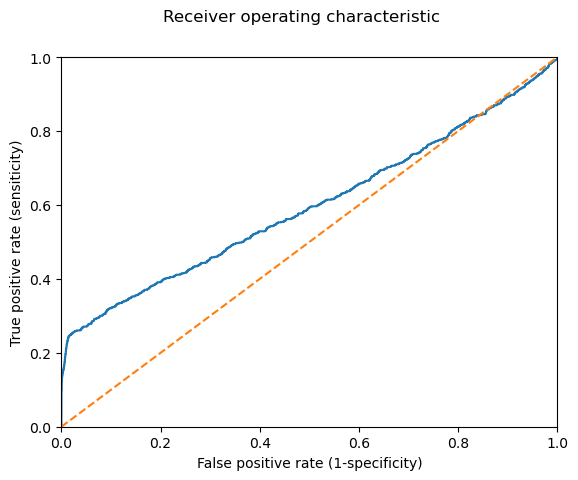

In [ ]:
print(model.auc())
model.plot_roc()

In [ ]:
print(model.native_energy())

-800.6030499840181


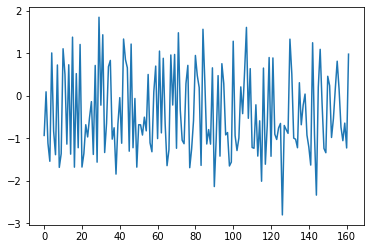

In [ ]:
plt.plot(model.frustration('singleresidue'))

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


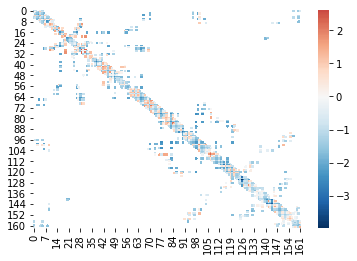

In [ ]:
sns.heatmap(model.frustration('mutational'),cmap='RdBu_r',center=0)

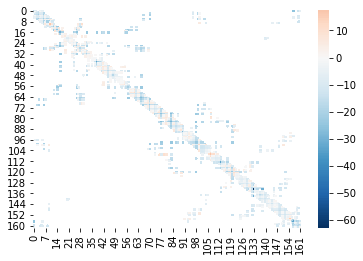

In [ ]:
sns.heatmap(model.frustration('configurational'),cmap='RdBu_r',center=0)

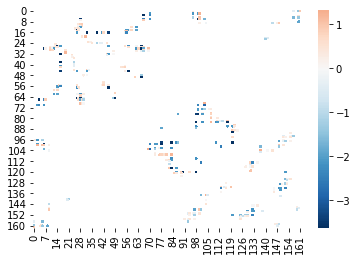

In [ ]:
sns.heatmap(model.frustration('contact'),cmap='RdBu_r',center=0)

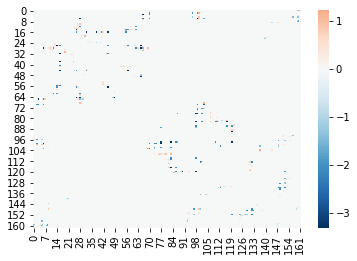

In [ ]:
sns.heatmap(model.frustration('contact',correction=0.1),cmap='RdBu_r',center=0)

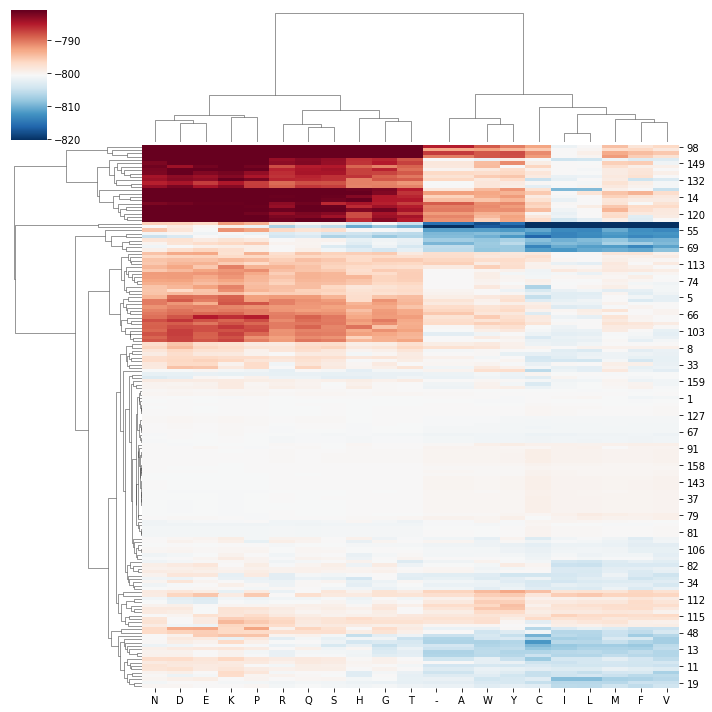

In [ ]:
model.plot_decoy_energy('singleresidue')

In [ ]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [ ]:
model.decoy_fluctuation('singleresidue').mean()

2.0684778358498632

In [ ]:
model.decoy_fluctuation('mutational').mean()

0.3465658727498636

In [ ]:
model.decoy_fluctuation('contact').mean()

0.015780082796613967

In [ ]:
model.view_frustration()


/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
# model.vmd()

In [ ]:
# model.view_frustration(pair='contact',correction=0.1,max_connections=400)

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [ ]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [ ]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [ ]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 3758 atoms and 1 coordinate set(s) were parsed in 0.03s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3762
  PDBConstructionWarning,
@> 3758 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [ ]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Trypsin (PDB: 3PTN)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 3220 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3220 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [ ]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## FGF (PDB: 1RG8)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff=8)

@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2250
  PDBConstructionWarning,
@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [ ]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:312: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:218: RuntimeWarning: invalid value encountered in less
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] < -0.78]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/AWSEM.py:219: RuntimeWarning: invalid value encountered in greater
  frustrated = sel_frustration[sel_frustration[:, -1] > 1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol